In [12]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.set_palette("Set3")
from matplotlib import style
style.use("ggplot")


In [13]:
pwd = os.getcwd()

In [14]:
df = pd.read_csv(pwd + "\\cancer patient data sets_working.csv")
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['index', 'patient id', 'age', 'gender', 'air pollution', 'alcohol use',
       'dust allergy', 'occupational hazards', 'genetic risk',
       'chronic lung disease', 'balanced diet', 'obesity', 'smoking',
       'passive smoker', 'chest pain', 'coughing of blood', 'fatigue',
       'weight loss', 'shortness of breath', 'wheezing',
       'swallowing difficulty', 'clubbing of finger nails', 'frequent cold',
       'dry cough', 'snoring', 'level'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   patient id                1000 non-null   object
 2   age                       1000 non-null   int64 
 3   gender                    1000 non-null   int64 
 4   air pollution             1000 non-null   int64 
 5   alcohol use               1000 non-null   int64 
 6   dust allergy              1000 non-null   int64 
 7   occupational hazards      1000 non-null   int64 
 8   genetic risk              1000 non-null   int64 
 9   chronic lung disease      1000 non-null   int64 
 10  balanced diet             1000 non-null   int64 
 11  obesity                   1000 non-null   int64 
 12  smoking                   1000 non-null   int64 
 13  passive smoker            1000 non-null   int64 
 14  chest pain               

In [17]:
df.describe()

,index,age,gender,air pollution,alcohol use,dust allergy,occupational hazards,genetic risk,chronic lung disease,balanced diet,...,coughing of blood,fatigue,weight loss,shortness of breath,wheezing,swallowing difficulty,clubbing of finger nails,frequent cold,dry cough,snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [18]:
df.level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [19]:
df.level = df.level.replace("Low", 0)
df.level = df.level.replace("Medium", 1)
df.level = df.level.replace("High", 2)

df = df.drop(columns=['index', 'patient id'])

df.level = df.level.astype("int64")

Visualization - trend identification

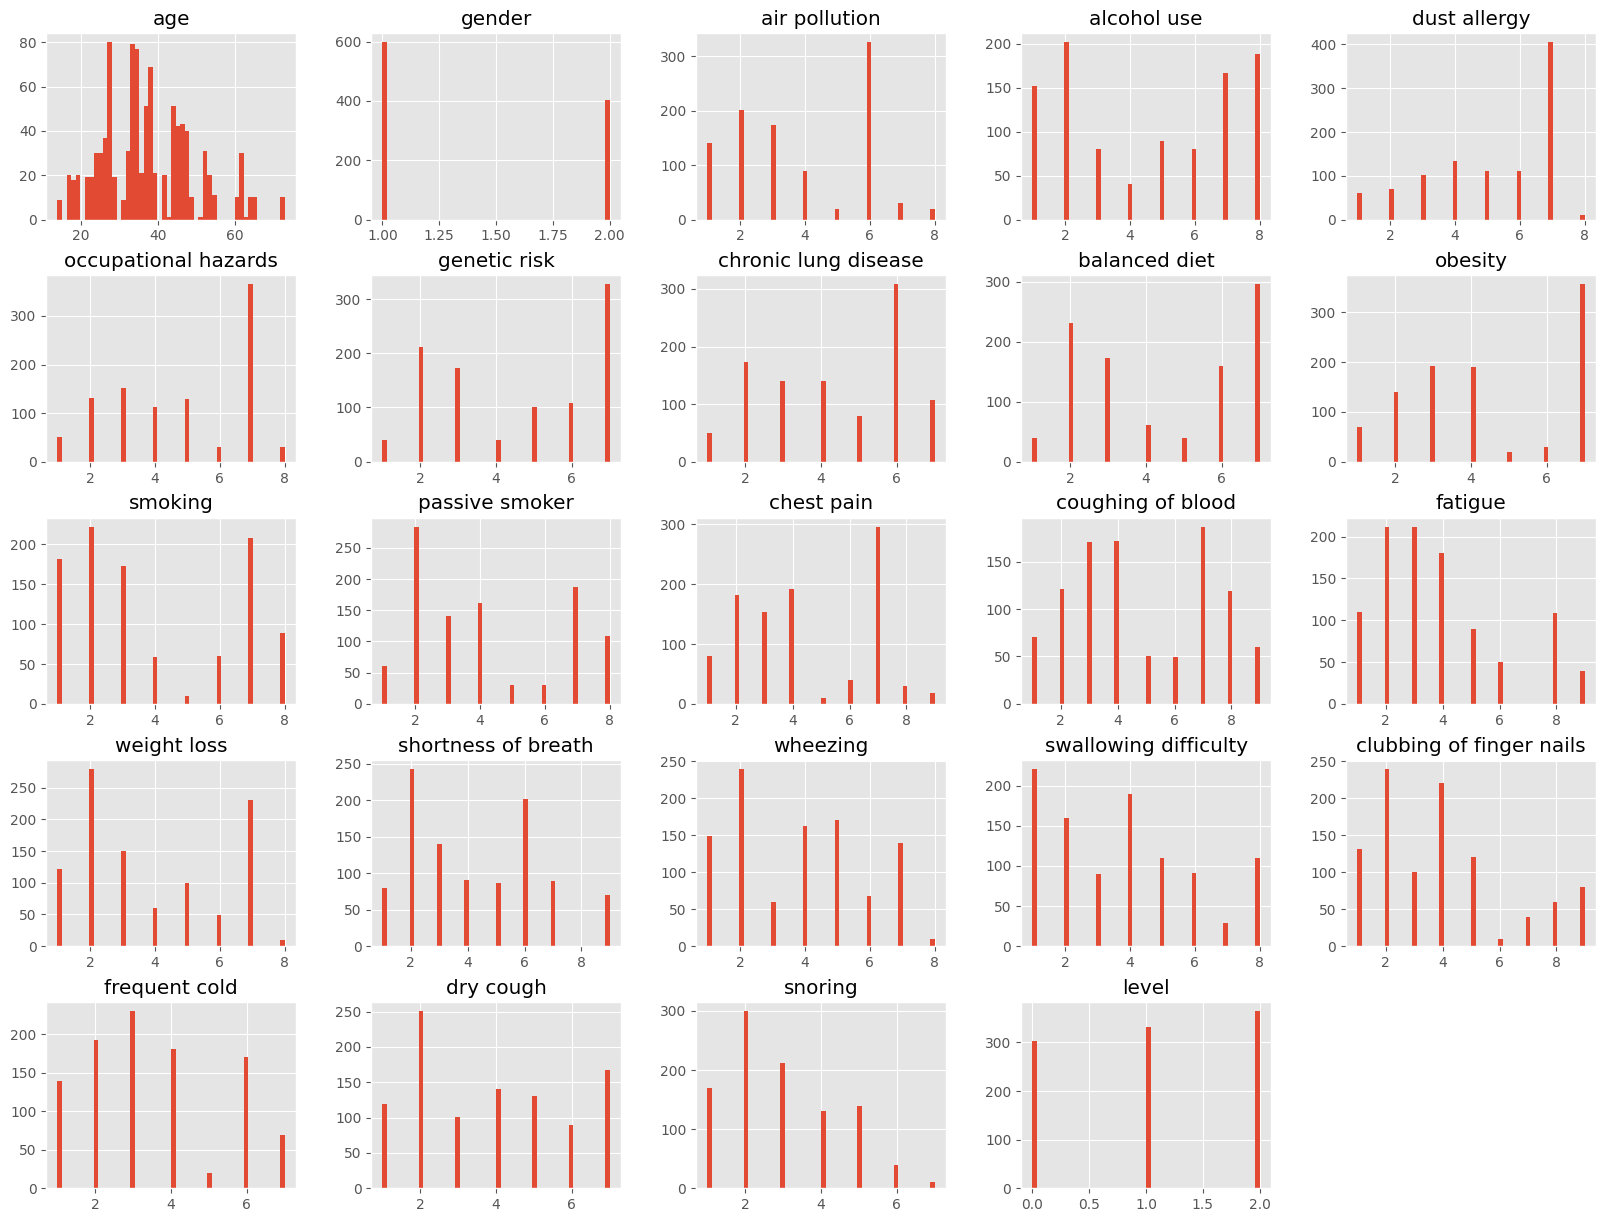

In [20]:
df.hist(bins=50, figsize=(20,15))
plt.show()

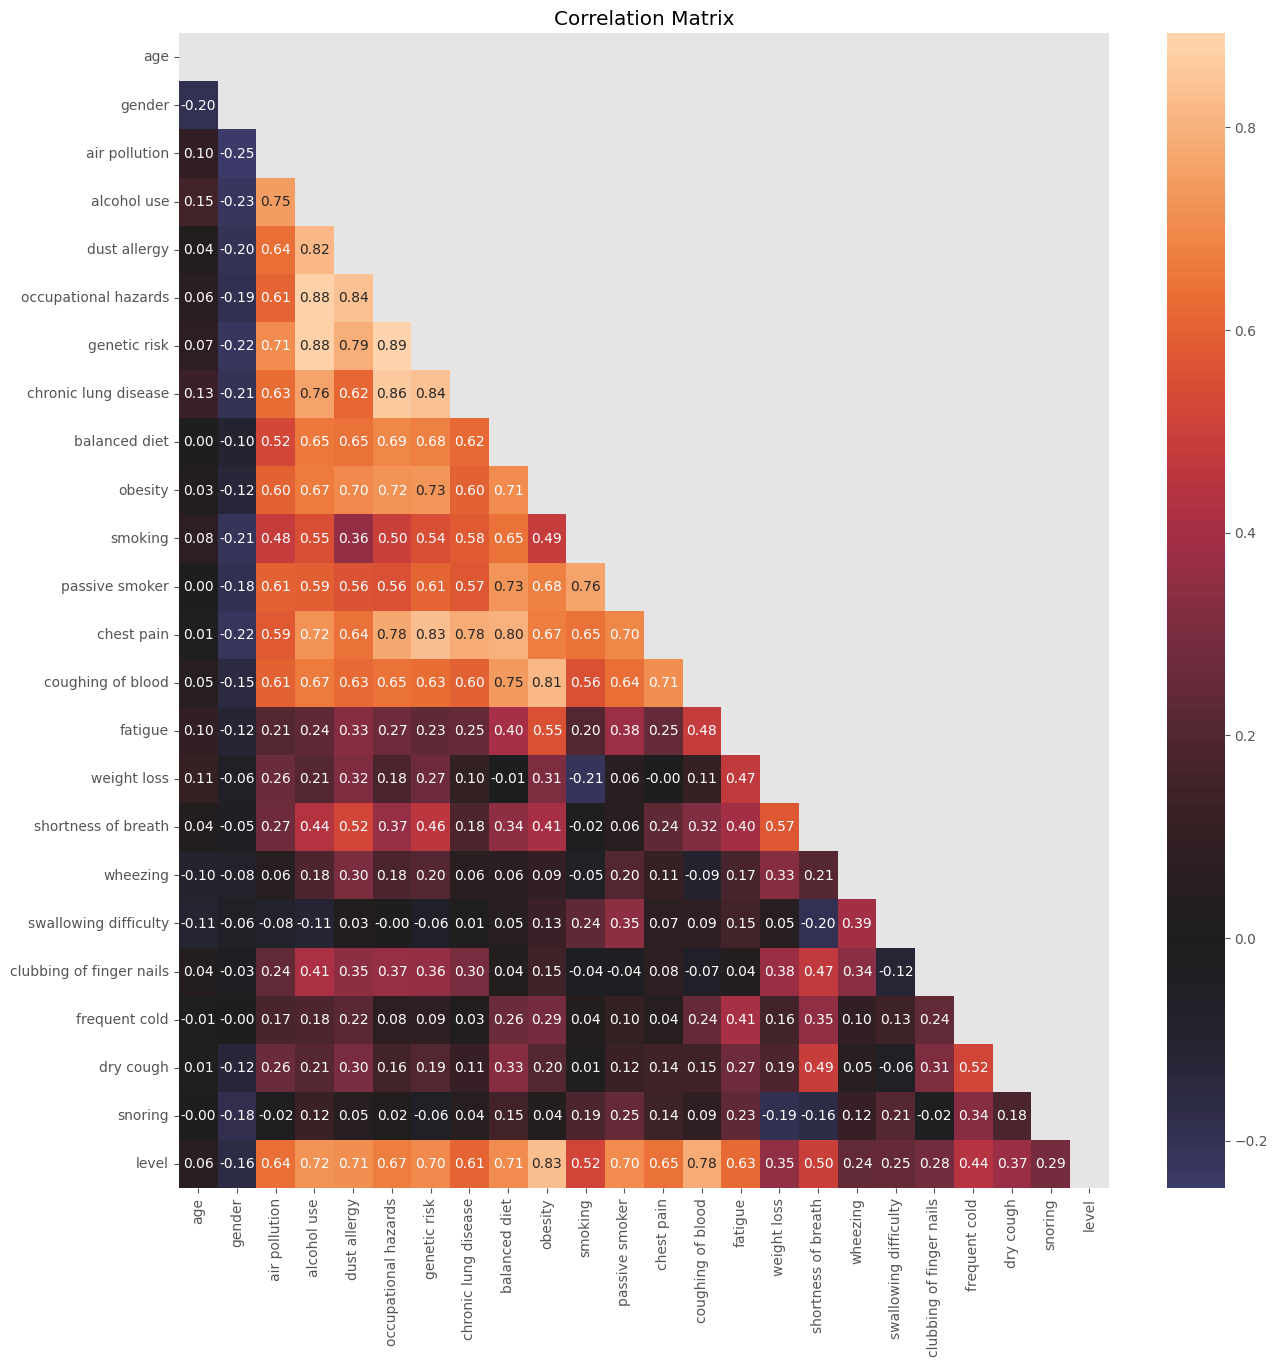

In [37]:
plt.figure(figsize=(15, 15))
correlation = df.corr() 
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)
_ = plt.title("Correlation Matrix")

Test and train set creation

Further dataset exploration

<AxesSubplot: ylabel='Frequency'>

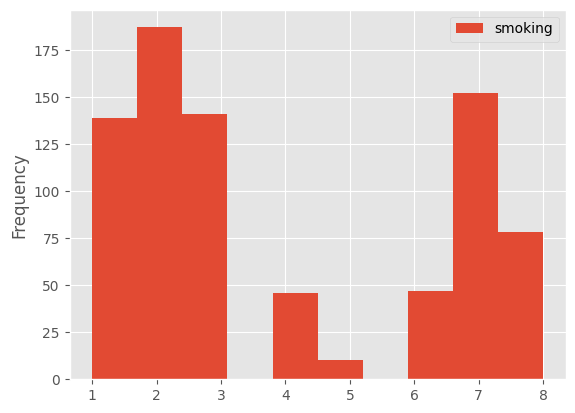

In [23]:
df_train.plot(kind="hist", x="level", y="smoking")

<AxesSubplot: ylabel='Frequency'>

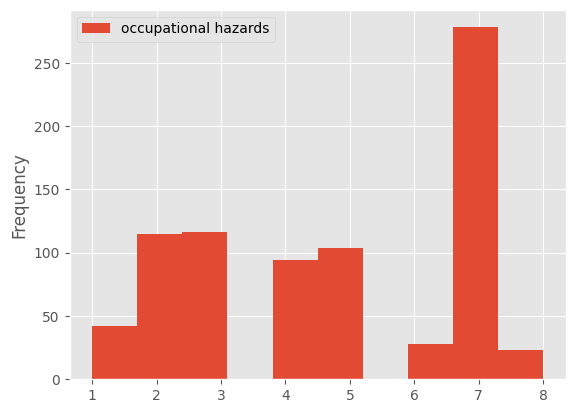

In [24]:
df_train.plot(kind="hist", x="level", y="occupational hazards")

High concentration of individuals at a level 7 risk level

In [25]:
corr_matrix = df_train.corr()

In [26]:
#Pearson's r correlation calculation
corr_matrix["level"]. sort_values(ascending=False)

level                       1.000000
obesity                     0.808902
coughing of blood           0.773155
alcohol use                 0.716695
dust allergy                0.710208
balanced diet               0.709855
genetic risk                0.703992
passive smoker              0.695070
occupational hazards        0.670837
chest pain                  0.640209
fatigue                     0.628221
air pollution               0.627957
chronic lung disease        0.615522
shortness of breath         0.522084
smoking                     0.515573
frequent cold               0.431743
dry cough                   0.372007
weight loss                 0.360460
clubbing of finger nails    0.284466
snoring                     0.277992
swallowing difficulty       0.248983
wheezing                    0.207411
age                         0.076185
gender                     -0.143545
Name: level, dtype: float64

Obesity has a very strong linear correlation to lung cancer risk

array([[<AxesSubplot: xlabel='level', ylabel='level'>,
        <AxesSubplot: xlabel='obesity', ylabel='level'>,
        <AxesSubplot: xlabel='coughing of blood', ylabel='level'>,
        <AxesSubplot: xlabel='dust allergy', ylabel='level'>,
        <AxesSubplot: xlabel='alcohol use', ylabel='level'>,
        <AxesSubplot: xlabel='balanced diet', ylabel='level'>],
       [<AxesSubplot: xlabel='level', ylabel='obesity'>,
        <AxesSubplot: xlabel='obesity', ylabel='obesity'>,
        <AxesSubplot: xlabel='coughing of blood', ylabel='obesity'>,
        <AxesSubplot: xlabel='dust allergy', ylabel='obesity'>,
        <AxesSubplot: xlabel='alcohol use', ylabel='obesity'>,
        <AxesSubplot: xlabel='balanced diet', ylabel='obesity'>],
       [<AxesSubplot: xlabel='level', ylabel='coughing of blood'>,
        <AxesSubplot: xlabel='obesity', ylabel='coughing of blood'>,
        <AxesSubplot: xlabel='coughing of blood', ylabel='coughing of blood'>,
        <AxesSubplot: xlabel='dust allerg

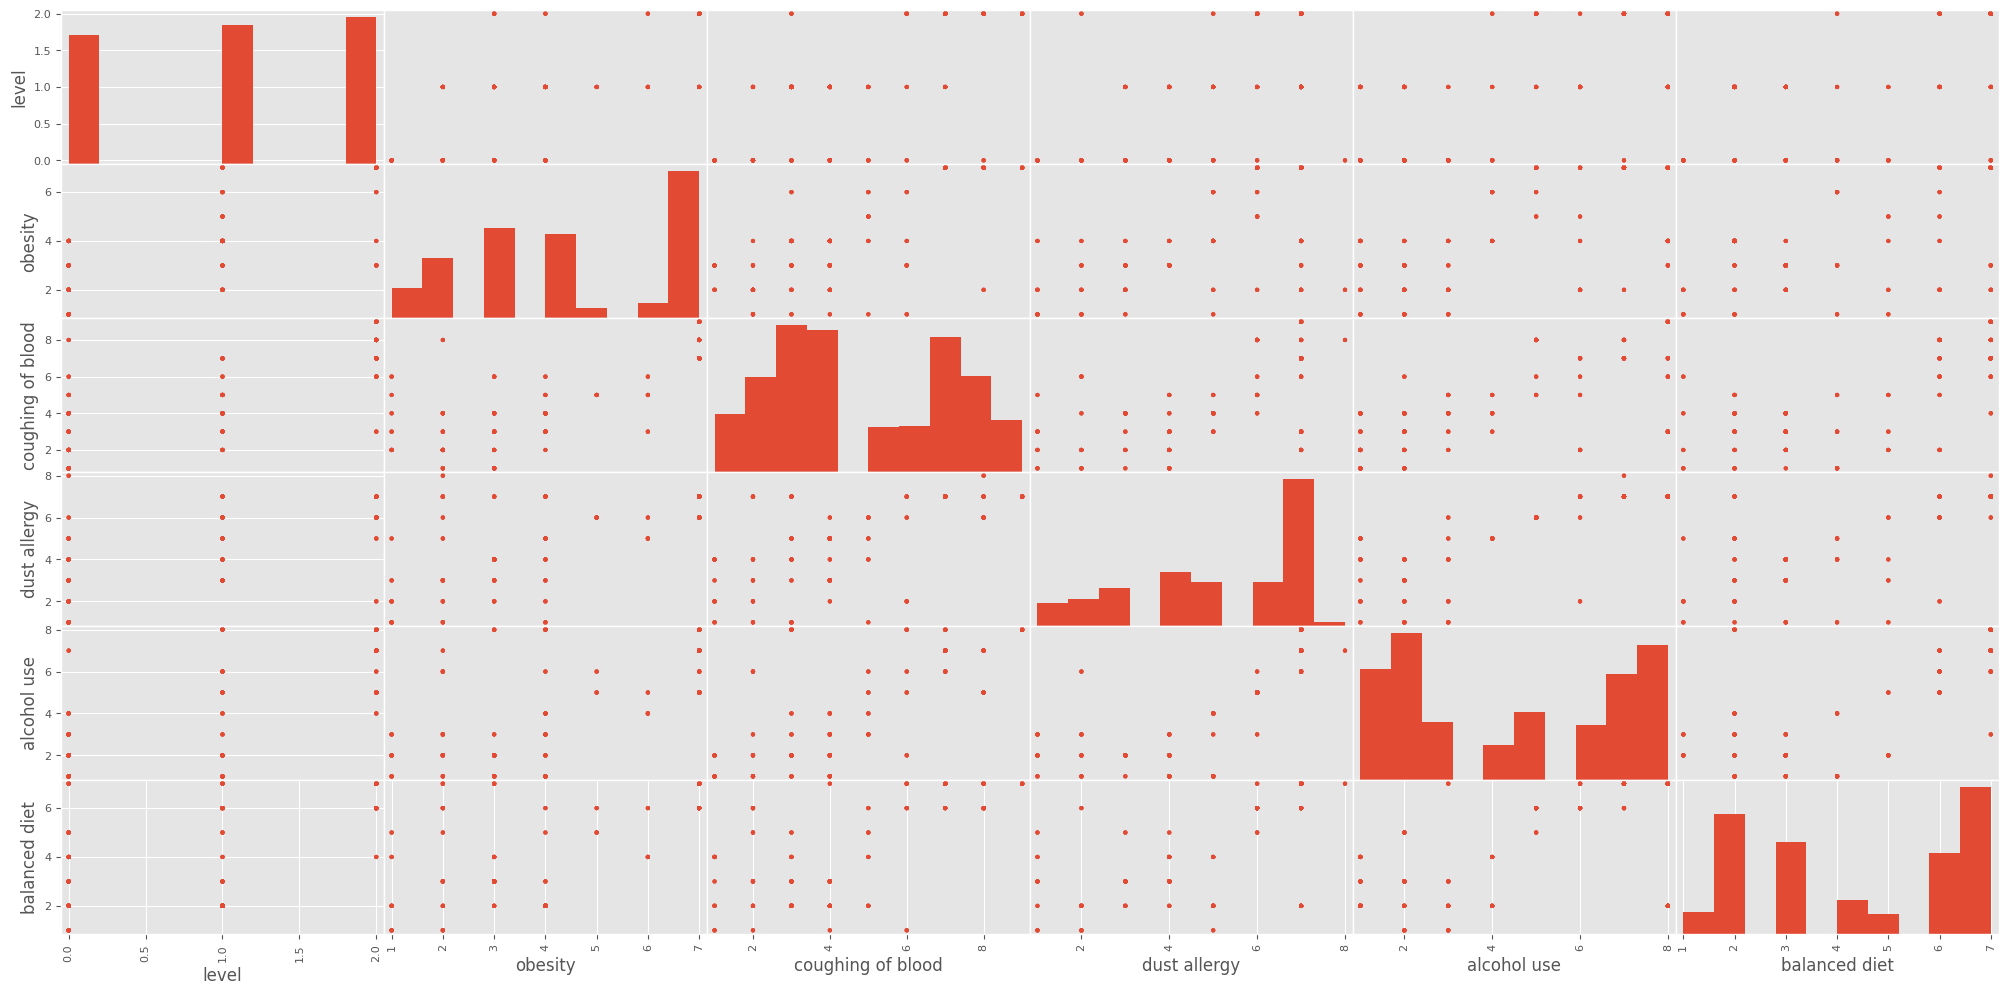

In [27]:
#scatter matrix for the top 5 vars with high peasons r scores
from pandas.plotting import scatter_matrix

attributes = ["level", "obesity", "coughing of blood", "dust allergy", "alcohol use",
"balanced diet"]

scatter_matrix(df_train[attributes], figsize=(25,12))

array([[<AxesSubplot: xlabel='level', ylabel='level'>,
        <AxesSubplot: xlabel='genetic risk', ylabel='level'>,
        <AxesSubplot: xlabel='passive smoker', ylabel='level'>,
        <AxesSubplot: xlabel='occupational hazards', ylabel='level'>,
        <AxesSubplot: xlabel='chest pain', ylabel='level'>,
        <AxesSubplot: xlabel='air pollution', ylabel='level'>],
       [<AxesSubplot: xlabel='level', ylabel='genetic risk'>,
        <AxesSubplot: xlabel='genetic risk', ylabel='genetic risk'>,
        <AxesSubplot: xlabel='passive smoker', ylabel='genetic risk'>,
        <AxesSubplot: xlabel='occupational hazards', ylabel='genetic risk'>,
        <AxesSubplot: xlabel='chest pain', ylabel='genetic risk'>,
        <AxesSubplot: xlabel='air pollution', ylabel='genetic risk'>],
       [<AxesSubplot: xlabel='level', ylabel='passive smoker'>,
        <AxesSubplot: xlabel='genetic risk', ylabel='passive smoker'>,
        <AxesSubplot: xlabel='passive smoker', ylabel='passive smoker'>,


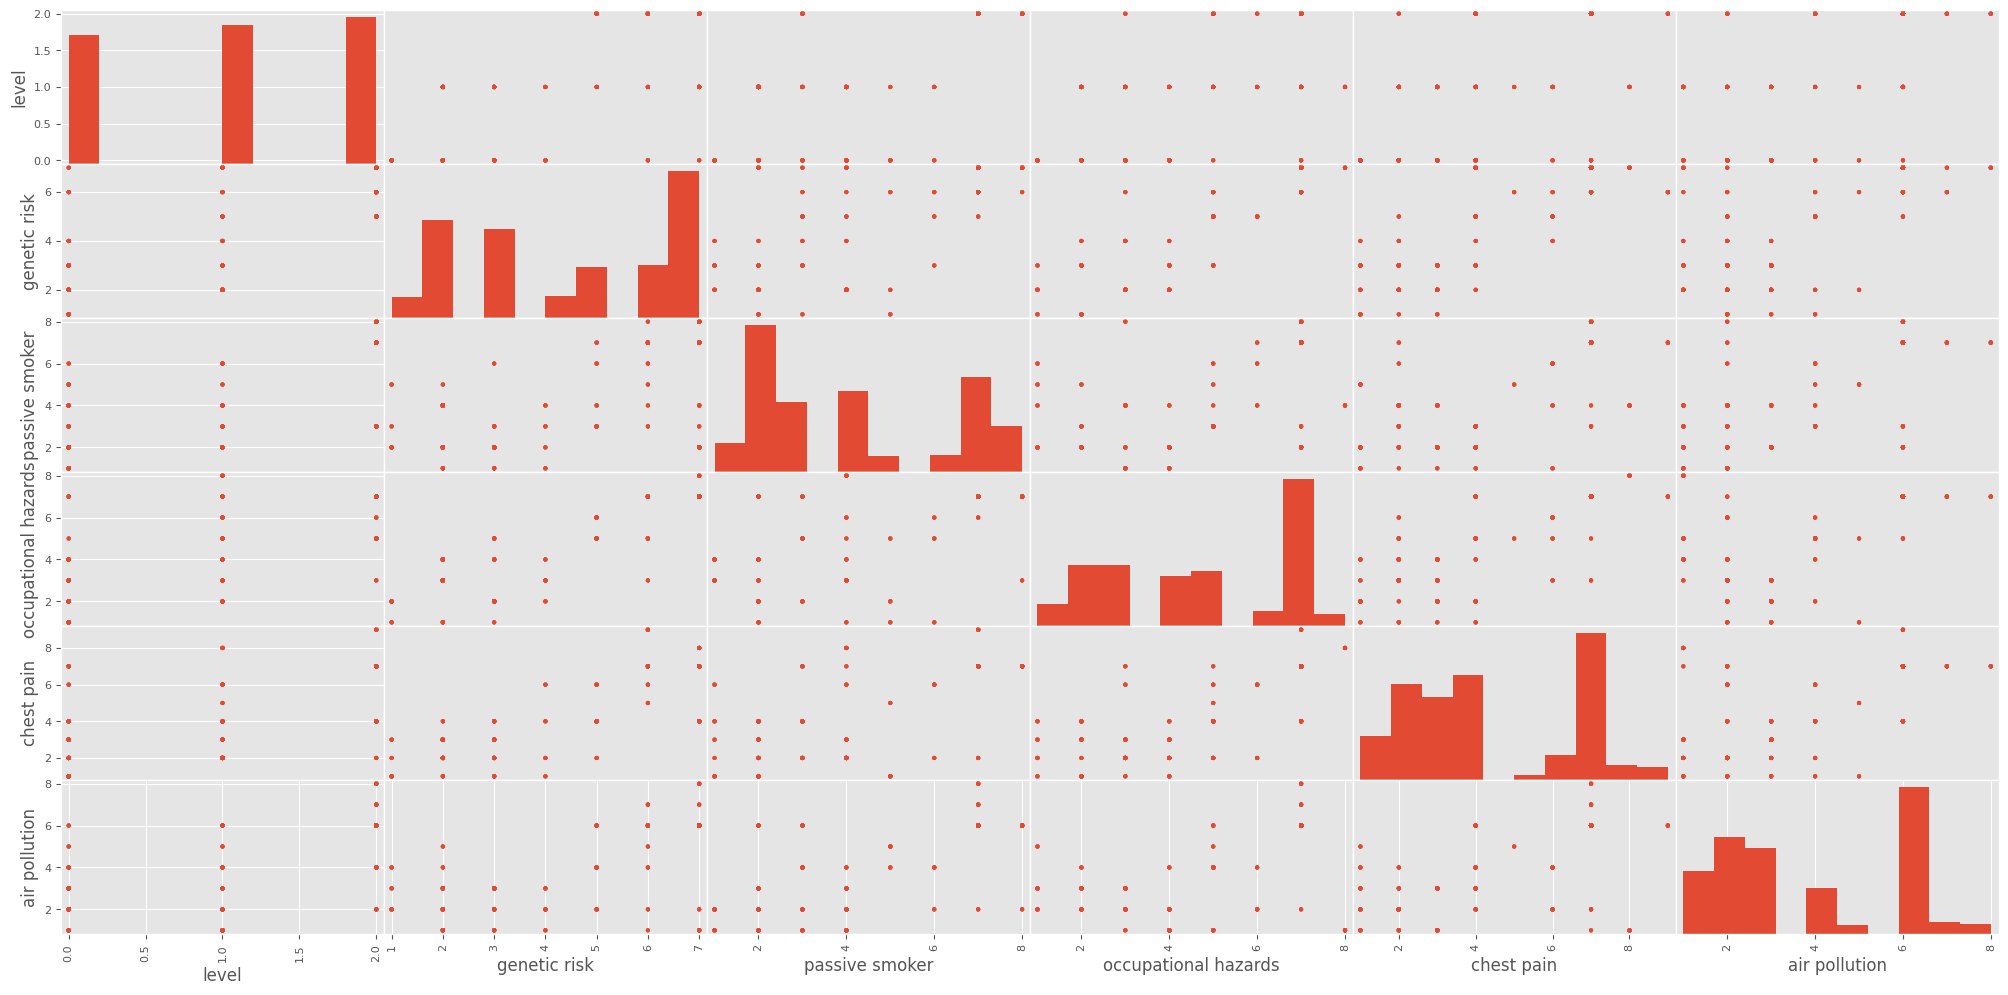

In [28]:
#scatter matrix for other vars of interest with high peasons r scores
from pandas.plotting import scatter_matrix

attributes = ["level", "genetic risk", "passive smoker", "occupational hazards",
 "chest pain", "air pollution"]

scatter_matrix(df_train[attributes], figsize=(25,12))

Don't see any notable trends 

EDA complete

Model selection and evaluation 

In [43]:
from sklearn.model_selection import train_test_split

x = df.drop("level", axis=1)
y = df["level"].copy()

x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x, y, test_size=.3, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_set = scaler.fit_transform(x_train_set)
x_test_set = scaler.fit_transform(x_test_set)

Logistic regression 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(x_train_set, y_train_set)

log_pred = log_reg.predict(x_test_set)

print("Predictions: ", log_pred)
print("Labels: ", list(y_test_set))

accuracy = accuracy_score(y_test_set, log_pred)

print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, log_pred)
print("confusion matrix: ")
print(conf_matrix)

sensitivity = []
specificity = []
for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp
    tn = conf_matrix.sum() - tp - fp - fn
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# compute average sensitivity and specificity
avg_sensitivity = sum(sensitivity) / len(sensitivity)
avg_specificity = sum(specificity) / len(specificity)

print("Average Sensitivity: ", avg_sensitivity)
print("Average Specificity: ", avg_specificity)

target_names = ["Class 0", "Class 1", "Class 2"]
print(classification_report(y_test_set, log_pred, target_names=target_names))

Predictions:  [1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 2 0 2 2 2 2 1 0 1 2 0 1 2 0 0 0 2 1 0 0 2 2
 1 2 0 2 2 0 1 1 0 0 1 2 0 1 2 0 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 1 2 2 0 1 1
 1 1 2 0 0 1 1 1 0 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 1 0 0 2 0 0 1 2 2 1 1 1 1
 2 2 0 1 2 1 2 1 1 2 2 0 0 1 2 2 2 2 2 0 1 0 2 1 0 1 2 1 1 0 1 0 0 2 1 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 0 1 2 0 2 0 1 2
 1 2 1 0 1 0 0 1 2 2 1 2 2 0 1 1 2 1 1 0 0 0 2 0 0 1 2 0 0 2 2 2 1 1 0 1 2
 2 0 1 2 2 2 1 2 2 2 0 2 0 2 1 1 1 2 2 2 1 2 1 2 2 1 1 1 1 2 1 0 1 0 1 2 0
 2 1 2 2 0 0 2 2 0 1 0 1 0 1 2 1 1 1 0 1 0 1 2 2 0 2 0 1 2 2 0 0 1 1 2 1 0
 0 2 0 0]
Labels:  [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 

testing decision trees

In [53]:
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(x_train_set, y_train_set)

tree_class = tree_classifier.predict(x_test_set)

print("Predictions: ", tree_class)
print("Labels: ", list(y_test_set))

accuracy = accuracy_score(y_test_set, tree_class)

print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, tree_class)
print("confusion matrix: ")
print(conf_matrix)

#this is to account for the 3x3 confusion matrix
sensitivity = []
specificity = []
for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp
    tn = conf_matrix.sum() - tp - fp - fn
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

avg_sensitivity = sum(sensitivity) / len(sensitivity)
avg_specificity = sum(specificity) / len(specificity)

print("Average Sensitivity: ", avg_sensitivity)
print("Average Specificity: ", avg_specificity)

target_names = ["Class 0", "Class 1", "Class 2"]
print(classification_report(y_test_set, tree_class, target_names=target_names))

Predictions:  [1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 2 0 2 2 2 2 1 0 1 2 0 1 2 0 0 0 2 1 0 0 2 2
 1 2 0 2 2 0 1 1 0 0 1 2 0 1 2 0 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 1 2 2 0 1 1
 1 1 2 0 0 1 1 1 0 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 1 0 0 2 0 0 1 2 2 1 1 1 1
 2 2 0 1 2 1 2 1 1 2 2 0 0 1 2 2 2 2 2 0 1 0 2 1 0 1 2 1 1 0 1 0 0 2 1 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 0 1 2 0 2 0 1 2
 1 2 1 0 1 0 0 1 2 2 1 2 2 0 1 1 2 1 1 0 0 0 2 0 0 1 2 0 0 2 2 2 1 1 0 1 2
 2 0 1 2 2 2 1 2 2 2 0 2 0 2 1 1 1 2 2 2 1 2 1 2 2 1 1 1 1 2 1 0 1 0 1 2 0
 2 1 2 2 0 0 2 2 0 1 0 1 0 1 2 1 1 1 0 1 0 1 2 2 0 2 0 1 2 2 0 0 1 1 2 1 0
 0 2 0 0]
Labels:  [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 

SVM

In [54]:
from sklearn import svm

svm_class = svm.SVC()
svm_class.fit(x_train_set, y_train_set)

svm_test = svm_class.predict(x_test_set)

print("Predictions: ", svm_test)
print("Labels: ", list(y_test_set))

accuracy = accuracy_score(y_test_set, svm_test)

print("Predictions: ", tree_class)
print("Labels: ", list(y_test_set))

accuracy = accuracy_score(y_test_set, svm_test)

print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test_set, svm_test)
print("confusion matrix: ")
print(conf_matrix)

sensitivity = []
specificity = []
for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp
    tn = conf_matrix.sum() - tp - fp - fn
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# compute average sensitivity and specificity
avg_sensitivity = sum(sensitivity) / len(sensitivity)
avg_specificity = sum(specificity) / len(specificity)

print("Average Sensitivity: ", avg_sensitivity)
print("Average Specificity: ", avg_specificity)

target_names = ["Class 0", "Class 1", "Class 2"]
print(classification_report(y_test_set, svm_test, target_names=target_names))

Predictions:  [1 1 1 2 1 1 1 1 1 1 0 1 1 1 0 2 0 2 2 2 2 1 0 1 2 0 1 2 0 0 0 2 1 0 0 2 2
 1 2 0 2 2 0 1 1 0 0 1 2 0 1 2 0 2 2 2 0 2 2 0 1 0 2 2 0 1 2 2 1 2 2 0 1 1
 1 1 2 0 0 1 1 1 0 1 2 2 2 0 2 2 0 0 1 2 2 2 2 2 1 0 0 2 0 0 1 2 2 1 1 1 1
 2 2 0 1 2 1 2 1 1 2 2 0 0 1 2 2 2 2 2 0 1 0 2 1 0 1 2 1 1 0 1 0 0 2 1 0 2
 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 0 2 1 0 1 2 0 2 0 1 2
 1 2 1 0 1 0 0 1 2 2 1 2 2 0 1 1 2 1 1 0 0 0 2 0 0 1 2 0 0 2 2 2 1 1 0 1 2
 2 0 1 2 2 2 1 2 2 2 0 2 0 2 1 1 1 2 2 2 1 2 1 2 2 1 1 1 1 2 1 0 1 0 1 2 0
 2 1 2 2 0 0 2 2 0 1 0 1 0 1 2 1 1 1 0 1 0 1 2 2 0 2 0 1 2 2 0 0 1 1 2 1 0
 0 2 0 0]
Labels:  [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 

100% accuracy for all three models; not realistic

- Feature important analysis
- Test for overfitting w/ cross-validation

In [93]:
def plot_feature_importances(model, feature_names):
    coefs = model.coef_[0]
    sorted_indices = np.argsort(coefs)[::-1]
    sorted_coefs = coefs[sorted_indices]
    sorted_features = [feature_names[i] for i in sorted_indices]
    
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances")
    plt.bar(range(len(coefs)), sorted_coefs)
    plt.xticks(range(len(coefs)), sorted_features, rotation=90)
    plt.show()


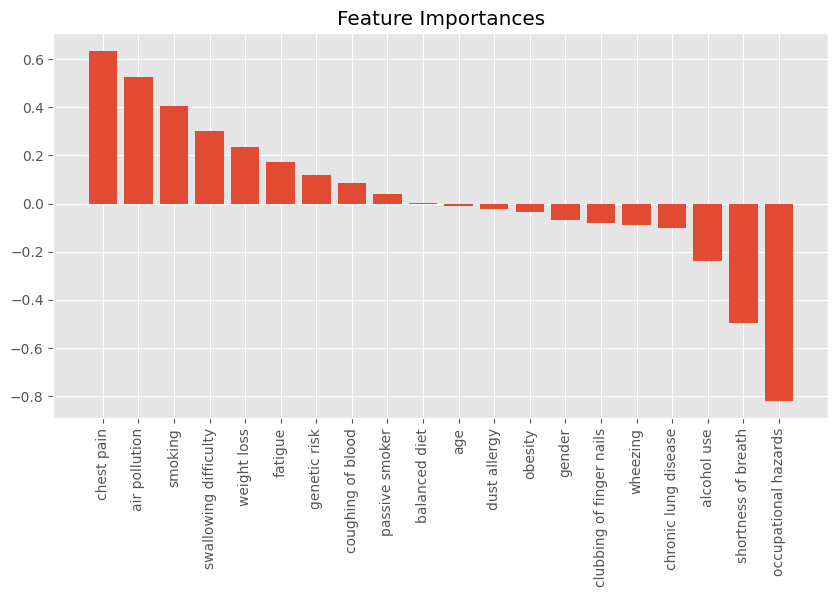

In [108]:
plot_feature_importances(log_reg, features)

In [109]:
def plot_feature_importances_tree(model, X, y):
    df_features = pd.DataFrame(X, columns=range(X.shape[1])) # use a pd dataframe in order to relabel the x-axis with the var names rather than feat. nums
    model.fit(X, y)
    importances = model.feature_importances_ 
    indices = np.argsort(importances)[::-1]
    features = df_features.columns.tolist()
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.show()

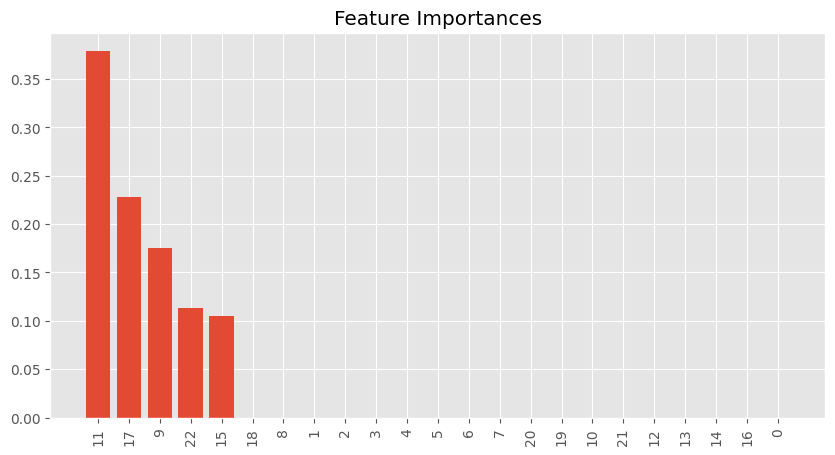

In [110]:
plot_feature_importances_tree(tree_classifier, x_train_set, y_train_set)

In [111]:
from sklearn.inspection import permutation_importance

def plot_feature_importances_permutation(model, X, y, feature_names):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=0, n_jobs=-1)
    sorted_indices = np.argsort(result.importances_mean)[::-1]
    sorted_importances = result.importances_mean[sorted_indices]
    sorted_features = [feature_names[i] for i in sorted_indices]
    
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importances")
    plt.bar(range(len(sorted_importances)), sorted_importances)
    plt.xticks(range(len(sorted_importances)), sorted_features, rotation=90)
    plt.show()

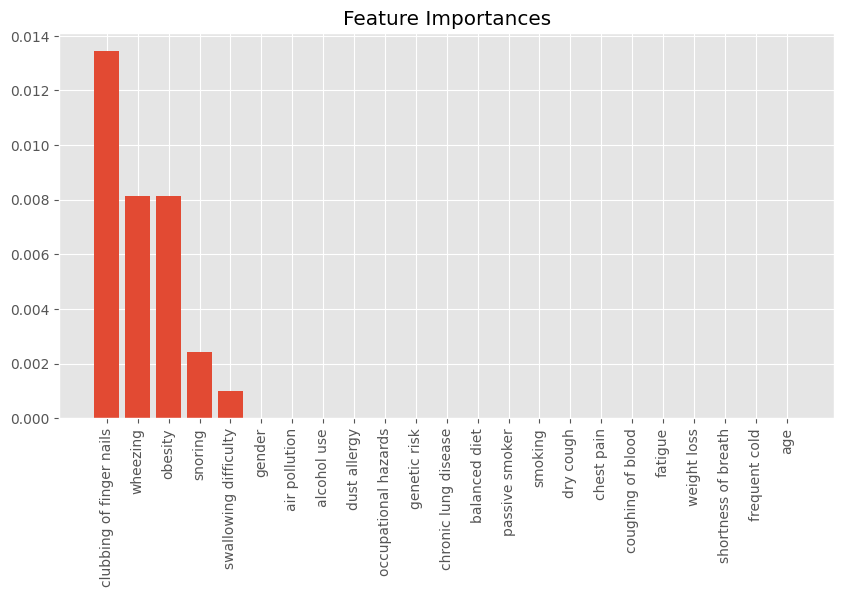

In [113]:
plot_feature_importances_permutation(svm_class, x_train_set, y_train_set, features)

Learning curves to check for overfitting

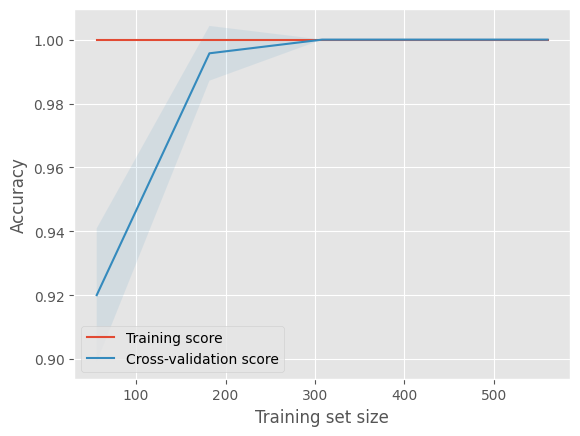

In [81]:
from sklearn.model_selection import learning_curve

# Generate your learning curves
train_sizes, train_scores, test_scores = learning_curve(log_reg, x_train_set, y_train_set, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


Convergence at 300 samples

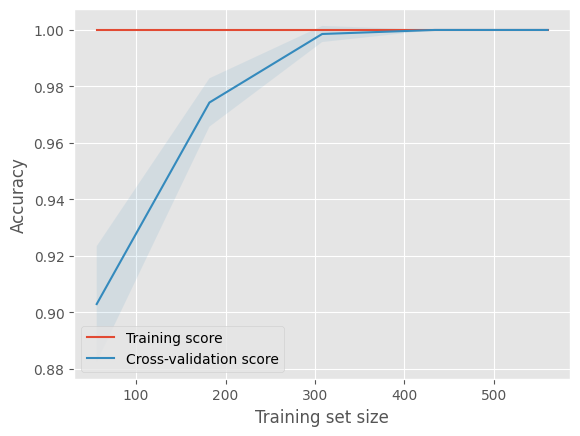

In [82]:
from sklearn.model_selection import learning_curve

# Generate your learning curves
train_sizes, train_scores, test_scores = learning_curve(tree_classifier, x_train_set, y_train_set, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Convergence at 400 samples

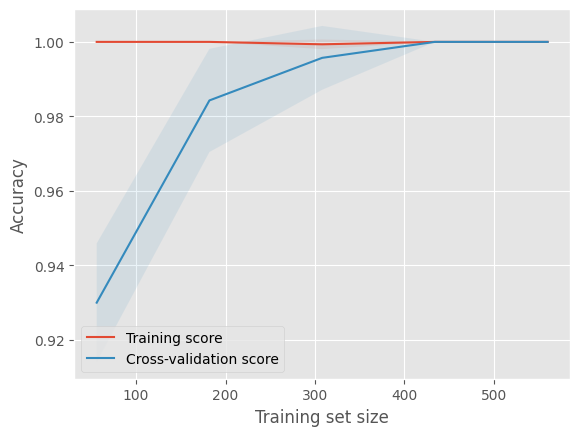

In [83]:
from sklearn.model_selection import learning_curve

# Generate your learning curves
train_sizes, train_scores, test_scores = learning_curve(svm_class, x_train_set, y_train_set, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

Convergence at approx. 420 samples

Conclusions:
- All 3 models are 100% accurate
- Learning curves suggest that the models will generalize well to new data
- Models are not realistic-- the dataset is small and may have been susceptible to leakage and/or overfitting
- More data and further analysis is required